# 生成5类非均匀分布的二维数据

导入所需要的库

In [168]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

生成5类非均匀分布的二维数据

In [169]:
np.random.seed(42) # 设置随机种子，确保可重复性

def generate_data():
    """ 生成 5 类非均匀分布的二维数据 """
    centers = [(-5, -2), (3, 5), (-2, 6), (6, -4), (1, 1)]
    num_samples = [50, 30, 40, 20, 60]  # 总和 200

    X, y = [], []
    for i, (cx, cy) in enumerate(centers):
        X.append(np.random.randn(num_samples[i], 2) + np.array([cx, cy]))
        y.extend([i] * num_samples[i])

    return np.vstack(X), np.array(y)

# 生成数据
X, y = generate_data()

绘制有标签和无标签的原始数据

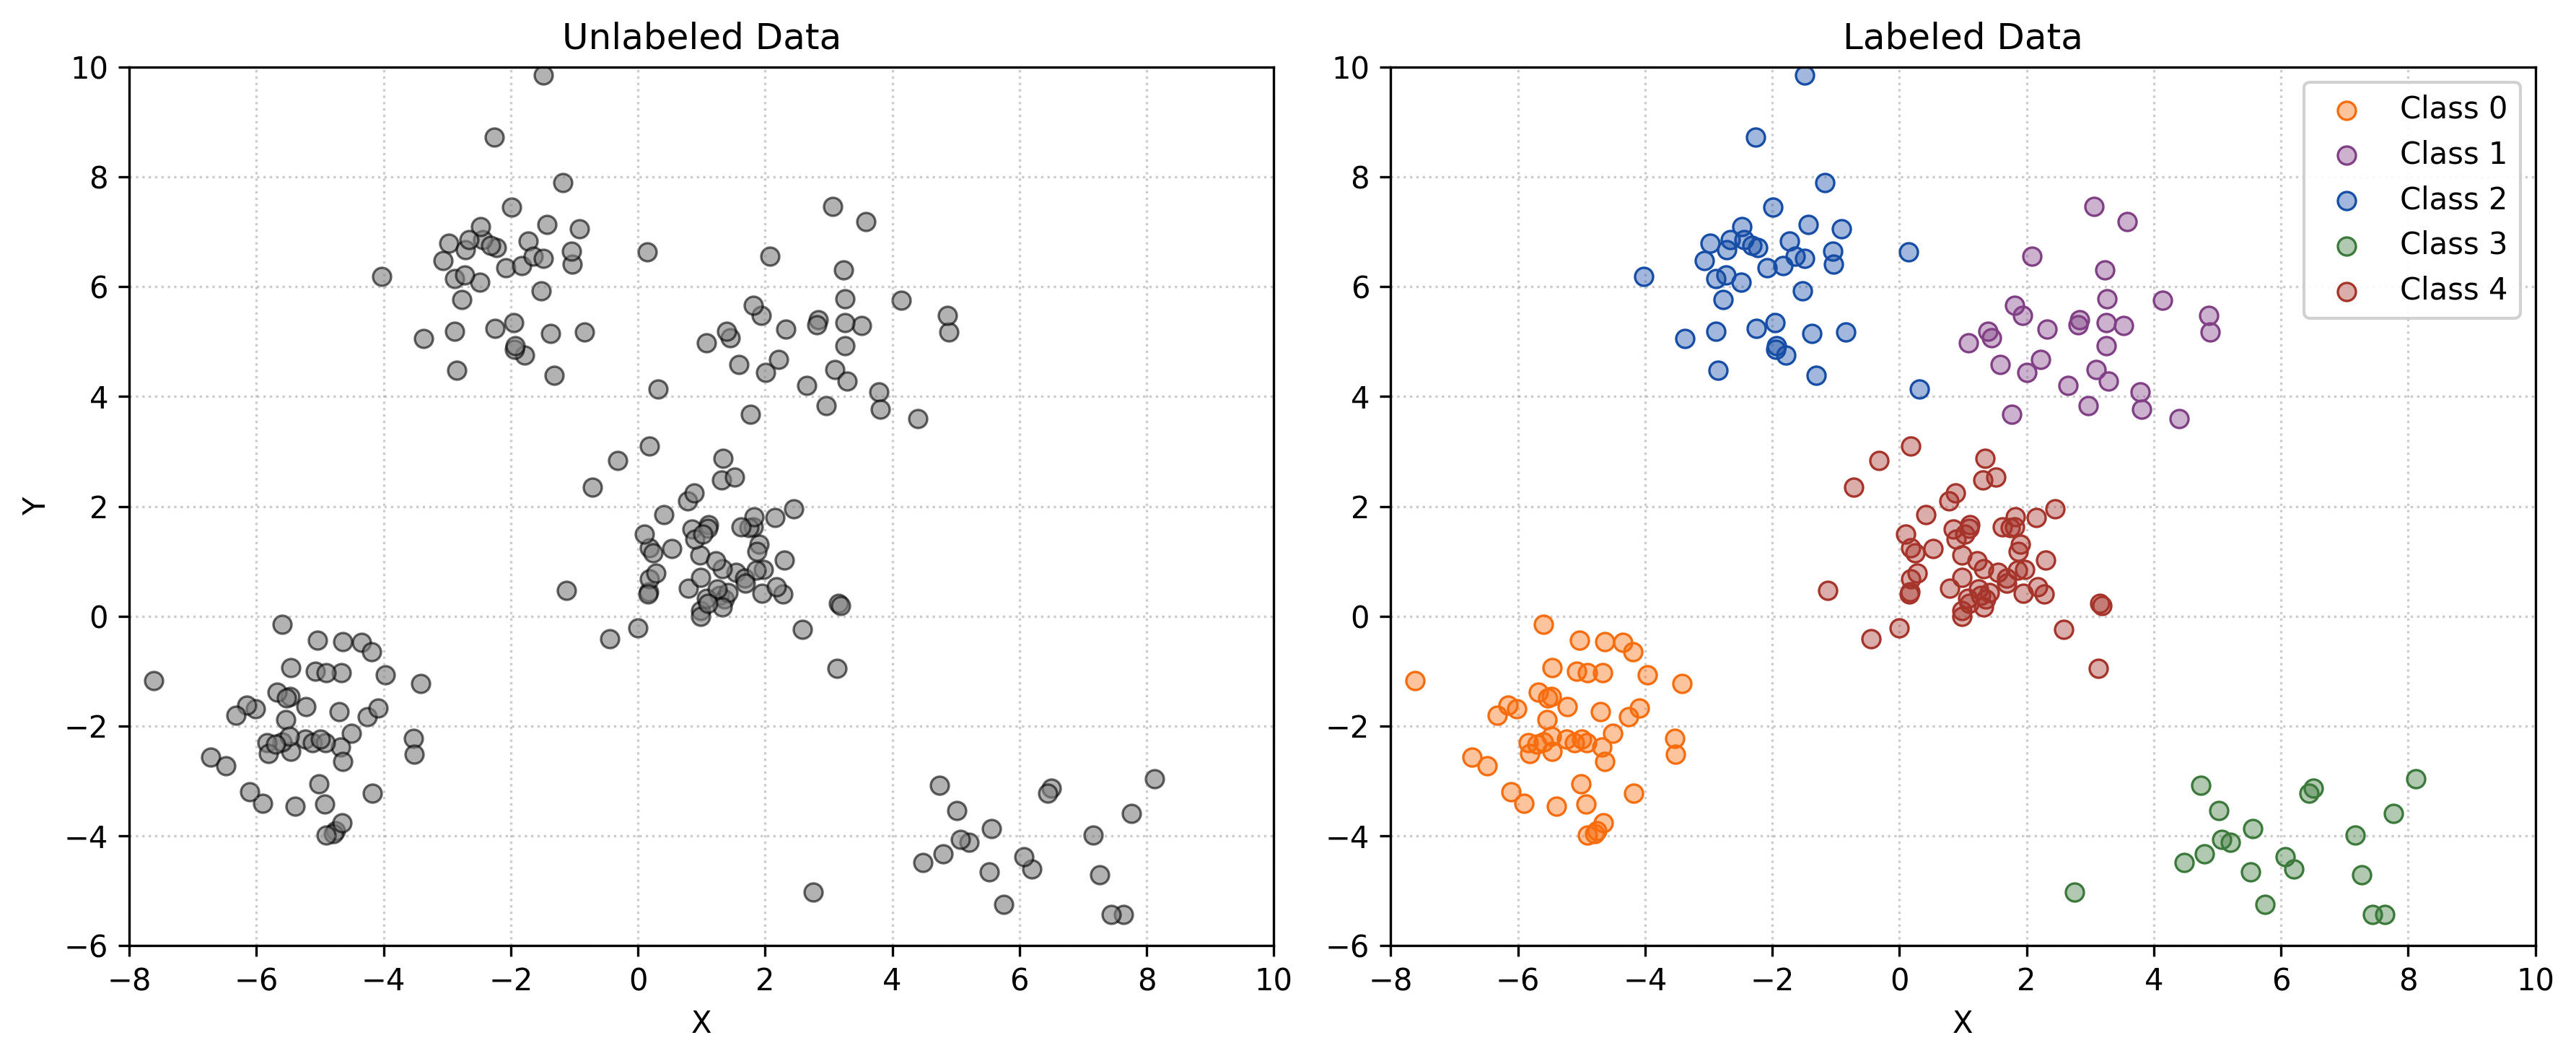

In [170]:
class_colors = [
    (0.970, 0.424, 0.046),   # Class 0
    (0.505, 0.250, 0.520),   # Class 1
    (0.086, 0.302, 0.651),   # Class 2
    (0.235, 0.480, 0.235),   # Class 3
    (0.650, 0.204, 0.169),   # Class 4
    (0.000, 0.392, 0.431),   # Class 5
    (1.000, 0.651, 0.000)    # Class 6
]

def plot_data(X, y, colors):
    """ 绘制无标签和有标签的原始数据 """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

    # 左图：无标签数据
    ax1.scatter(X[:, 0], X[:, 1], 
                c='grey', edgecolor='black', alpha=0.6, linewidths=0.8)
    ax1.set(xlabel="X", ylabel="Y", title="Unlabeled Data")

    # 右图：带标签数据
    for i in range(5):
        ax2.scatter(X[y == i, 0], X[y == i, 1],
                    facecolors=[(*colors[i], 0.4)],  
                    edgecolors=[colors[i]], linewidths=0.8, label=f'Class {i}', zorder=2)               

    ax2.legend(loc='upper right', framealpha=0.9)
    ax2.set(xlabel="X", title="Labeled Data")

    for ax in [ax1, ax2]:
        ax.set(xlim=(-8, 10), ylim=(-6, 10))
        ax.grid(True, linestyle=':', color='gray', alpha=0.4)

    plt.tight_layout()
    plt.show()

# 绘制数据
plot_data(X, y, class_colors)

# K-means聚类分析

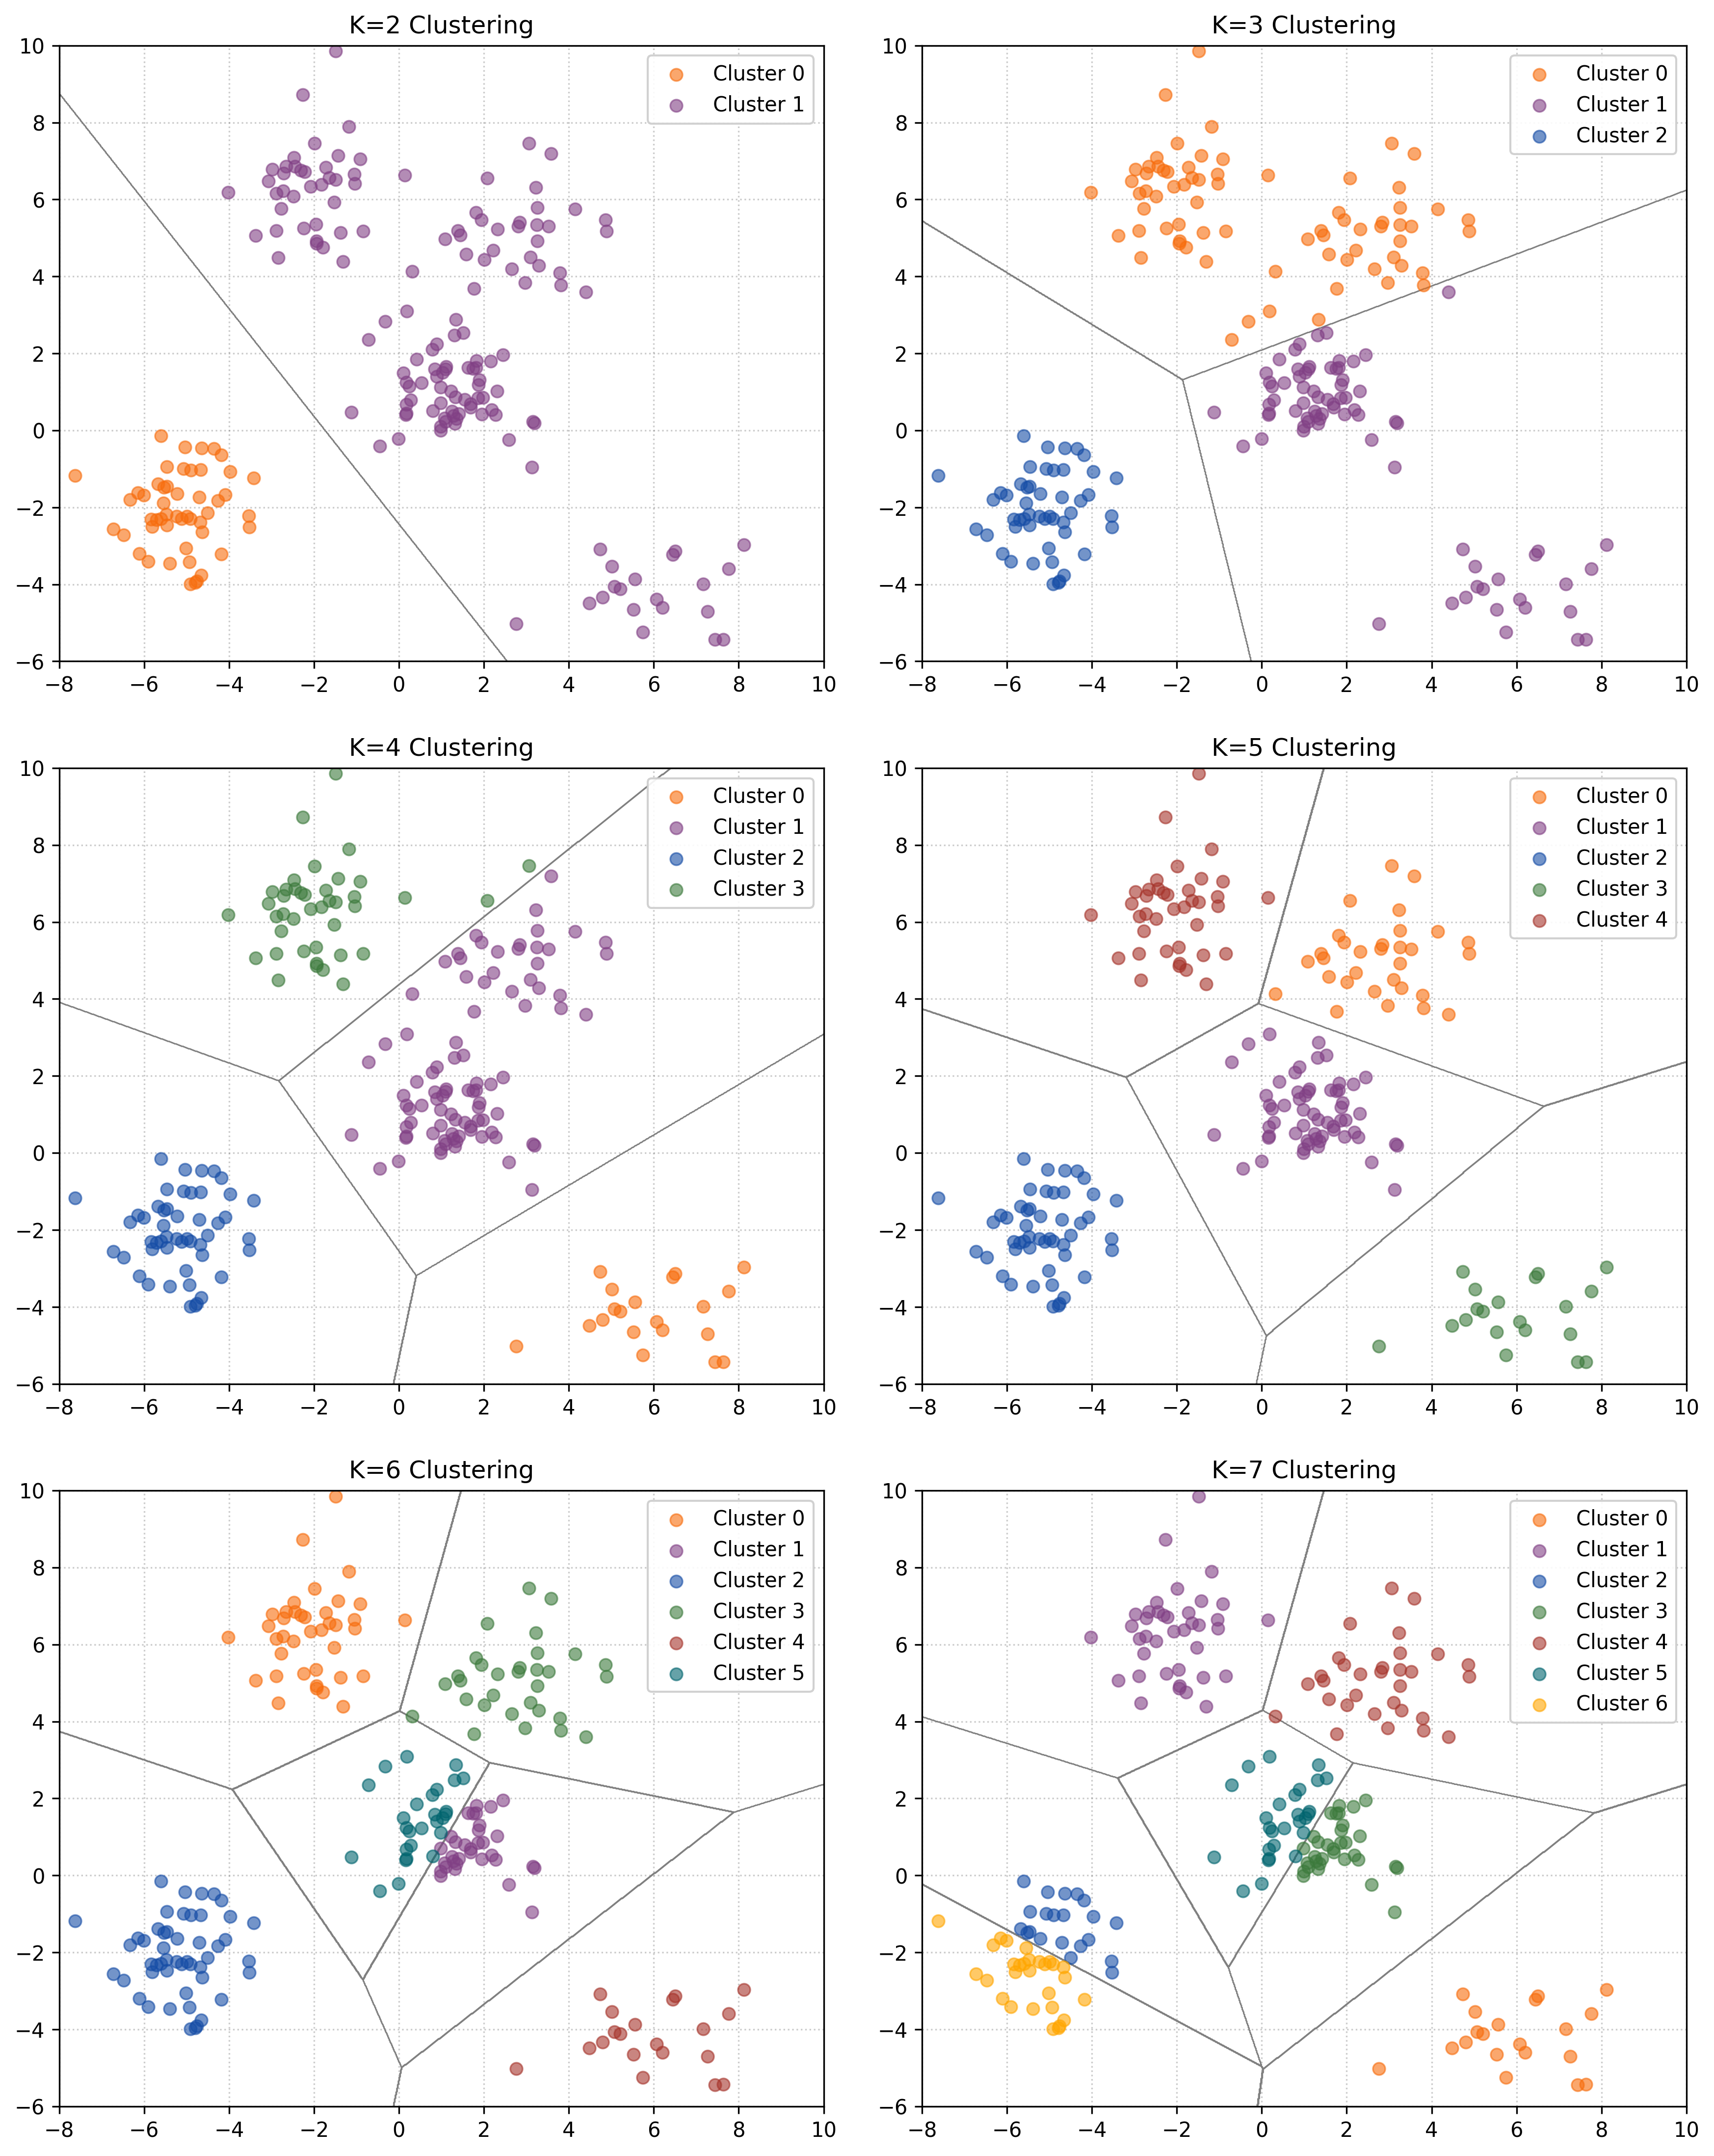

In [171]:
def plot_clusters(ax, X, k, colors):
    """ 可视化 K-Means 聚类结果 """
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    labels = kmeans.fit_predict(X)

    xx, yy = np.meshgrid(np.linspace(-8, 10, 1000), 
                         np.linspace(-6, 10, 1000))
    Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # 绘制决策边界
    ax.contour(xx, yy, Z, levels=np.arange(-0.5, k+0.5), colors='gray', linewidths=0.7, linestyles='solid')

    # 绘制聚类数据点
    for i in range(k):
        mask = labels == i
        ax.scatter(X[mask, 0], X[mask, 1],
                   facecolors=[(*colors[i], 0.4)],
                   edgecolors=[colors[i]],
                   linewidths=0.8, alpha=0.6, zorder=2, label=f'Cluster {i}')

def visualize_kmeans(X, colors):
    """ 对不同的 K 值进行 K-Means 聚类并可视化 """
    k_values = range(2, 8)

    n_rows = int(np.ceil(len(k_values) / 2))  # 每行2个子图
    fig, axs = plt.subplots(n_rows, 2, figsize=(12, 5 * n_rows), dpi=300, squeeze=False)

    for idx, k in enumerate(k_values):
        row, col = divmod(idx, 2)
        plot_clusters(axs[row, col], X, k, colors[:k])
        axs[row, col].set(xlim=(-8, 10), ylim=(-6, 10),
                          xticks=np.arange(-8, 11, 2), yticks=np.arange(-6, 11, 2),
                          title=f"K={k} Clustering")
        axs[row, col].grid(True, linestyle=':', color='gray', alpha=0.4)
        axs[row, col].legend(loc='upper right', framealpha=0.9)

    plt.tight_layout(pad=2.0)
    plt.show()

# 运行 K-Means 并可视化
visualize_kmeans(X, class_colors)

# 确定选择的 K 值

## 方法1: Elbow Method肘部法

K=1, SSE=5454.859551223837
K=2, SSE=3093.3873809990864
K=3, SSE=1511.5499091840773
K=4, SSE=740.4368451445009
K=5, SSE=358.0265811876863
K=6, SSE=323.5585872718334
K=7, SSE=291.6458204145947
K=8, SSE=265.5854425820446
K=9, SSE=239.11336136666228
K=10, SSE=219.63191781766204
一阶差分（变化率）： [-2361.47217022 -1581.83747182  -771.11306404  -382.41026396
   -34.46799392   -31.91276686   -26.06037783   -26.47208122
   -19.48144355]
二阶差分（加速度）： [ 7.79634698e+02  8.10724408e+02  3.88702800e+02  3.47942270e+02
  2.55522706e+00  5.85238902e+00 -4.11703383e-01  6.99063767e+00]


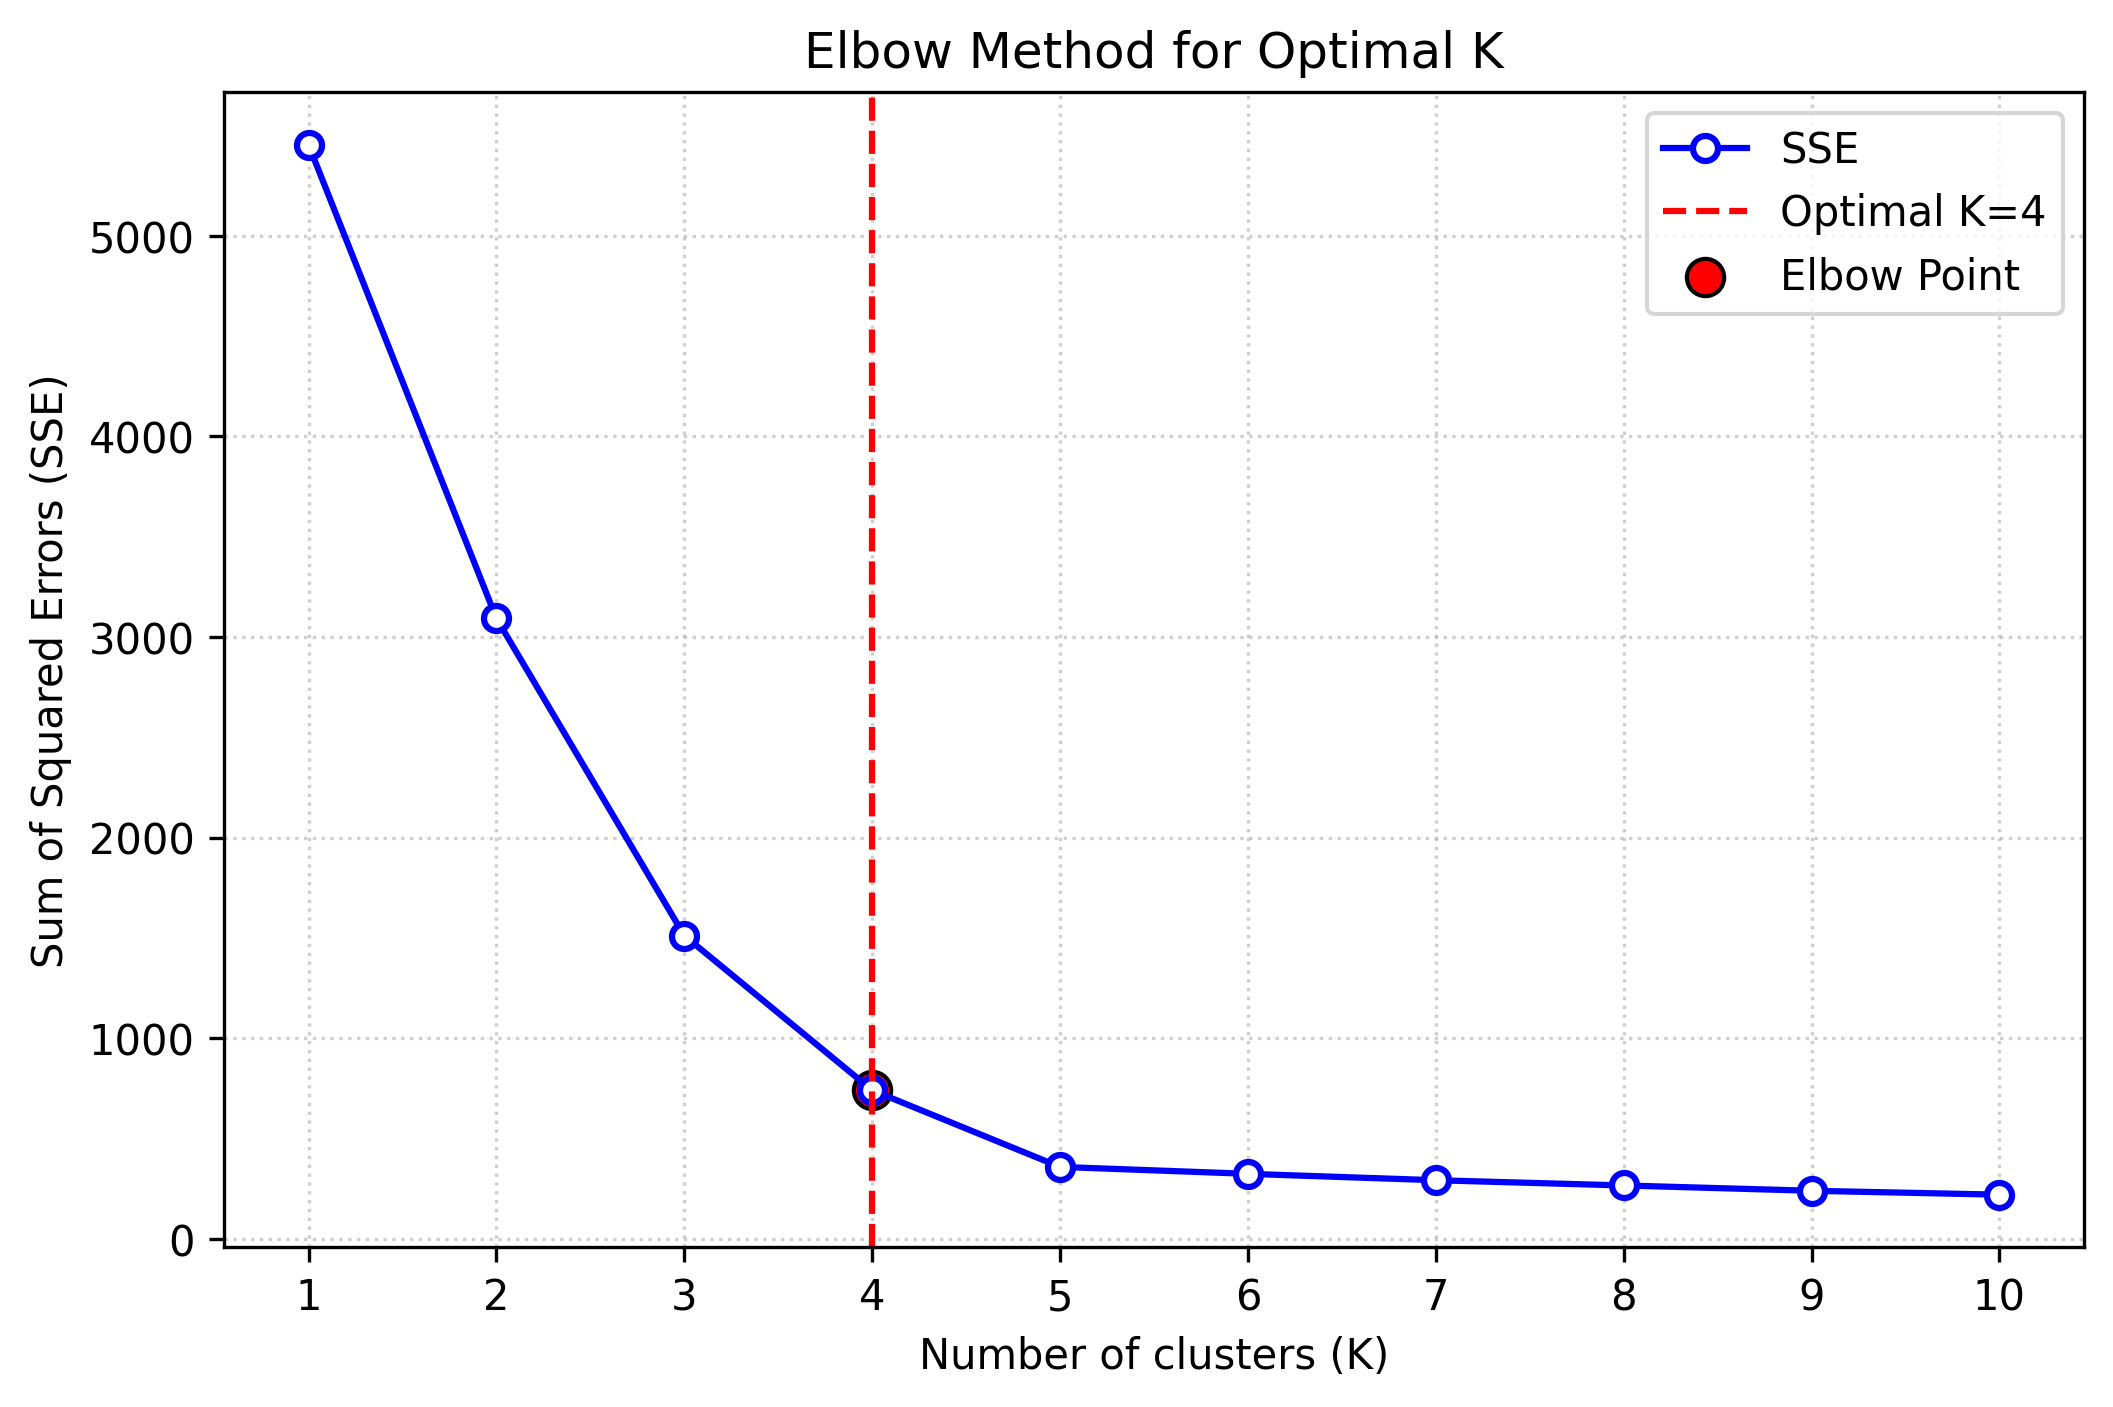

自动计算出的最佳 K 值为: 4


In [172]:
def find_elbow_point(sse, k_values):
    """ 计算拐点（Elbow Point），基于最大二阶差分 """
    # 计算一阶差分：变化率
    first_derivative = np.diff(sse)
    print("一阶差分（变化率）：", first_derivative) 
    
    # 计算二阶差分：变化的加速度
    second_derivative = np.diff(first_derivative)
    print("二阶差分（加速度）：", second_derivative) 
    
    # 找到二阶差分最大的点（对应拐点）
    best_k_index = np.argmax(np.abs(second_derivative)) + 2  # 二阶差分的长度比SSE少2个
    best_k = k_values[best_k_index]
    return best_k, second_derivative

def elbow_method(X, max_k=10):
    """ 使用 Elbow 方法计算最佳 K 值并可视化 """
    sse = []  # 存储 SSE
    k_values = range(1, max_k + 1)
    
    # 计算 SSE
    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)
        sse_value = kmeans.inertia_
        sse.append(sse_value)
        print(f"K={k}, SSE={sse_value}")  # 打印每次计算的结果

    # 计算最佳 K 值和二阶差分
    best_k, second_derivative = find_elbow_point(sse, k_values)

    # 可视化 Elbow 方法
    plt.figure(figsize=(8, 5), dpi=300)
    plt.plot(k_values, sse, 'bo-', markersize=6, linewidth=1.5, 
             markerfacecolor='white', markeredgewidth=1.5, label="SSE")

    # 标记拐点
    plt.axvline(best_k, color='r', linestyle='--', label=f'Optimal K={best_k}')
    plt.scatter(best_k, sse[best_k-1], color='red', s=80, edgecolors='black', label='Elbow Point')

    # 图表设置
    plt.xlabel('Number of clusters (K)', fontsize=10)
    plt.ylabel('Sum of Squared Errors (SSE)', fontsize=10)
    plt.title('Elbow Method for Optimal K', fontsize=12)
    plt.xticks(k_values)
    plt.legend()
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.show()

    # 打印计算出的最佳 K 值
    print(f"自动计算出的最佳 K 值为: {best_k}")

# 生成 Elbow 图并计算最佳 K 值
elbow_method(X)

## 方法2：轮廓系数法

K=2, Silhouette Score=0.5003


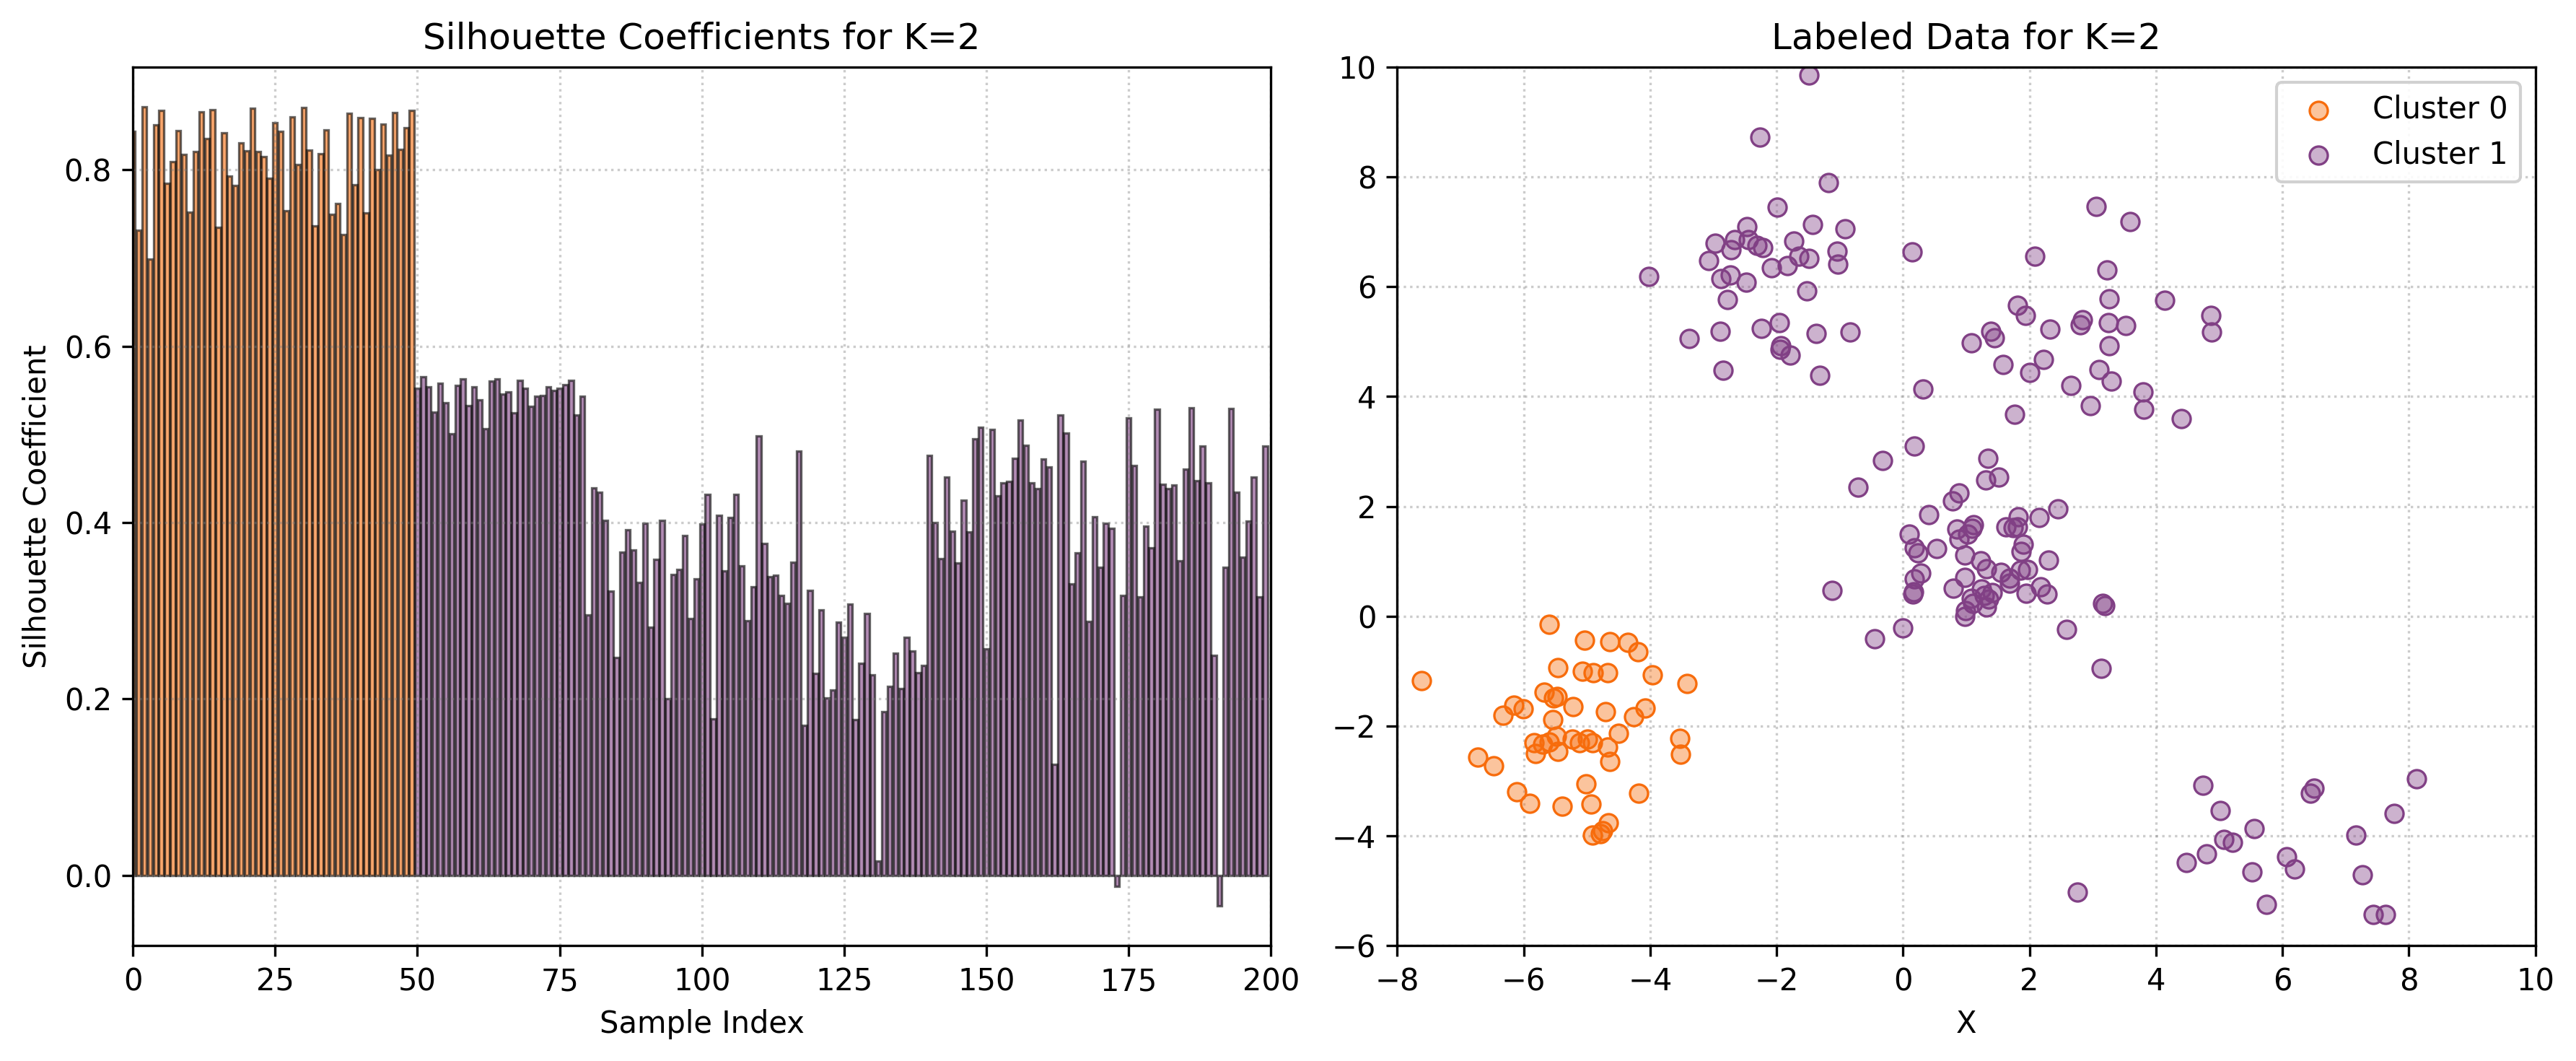

K=3, Silhouette Score=0.5460


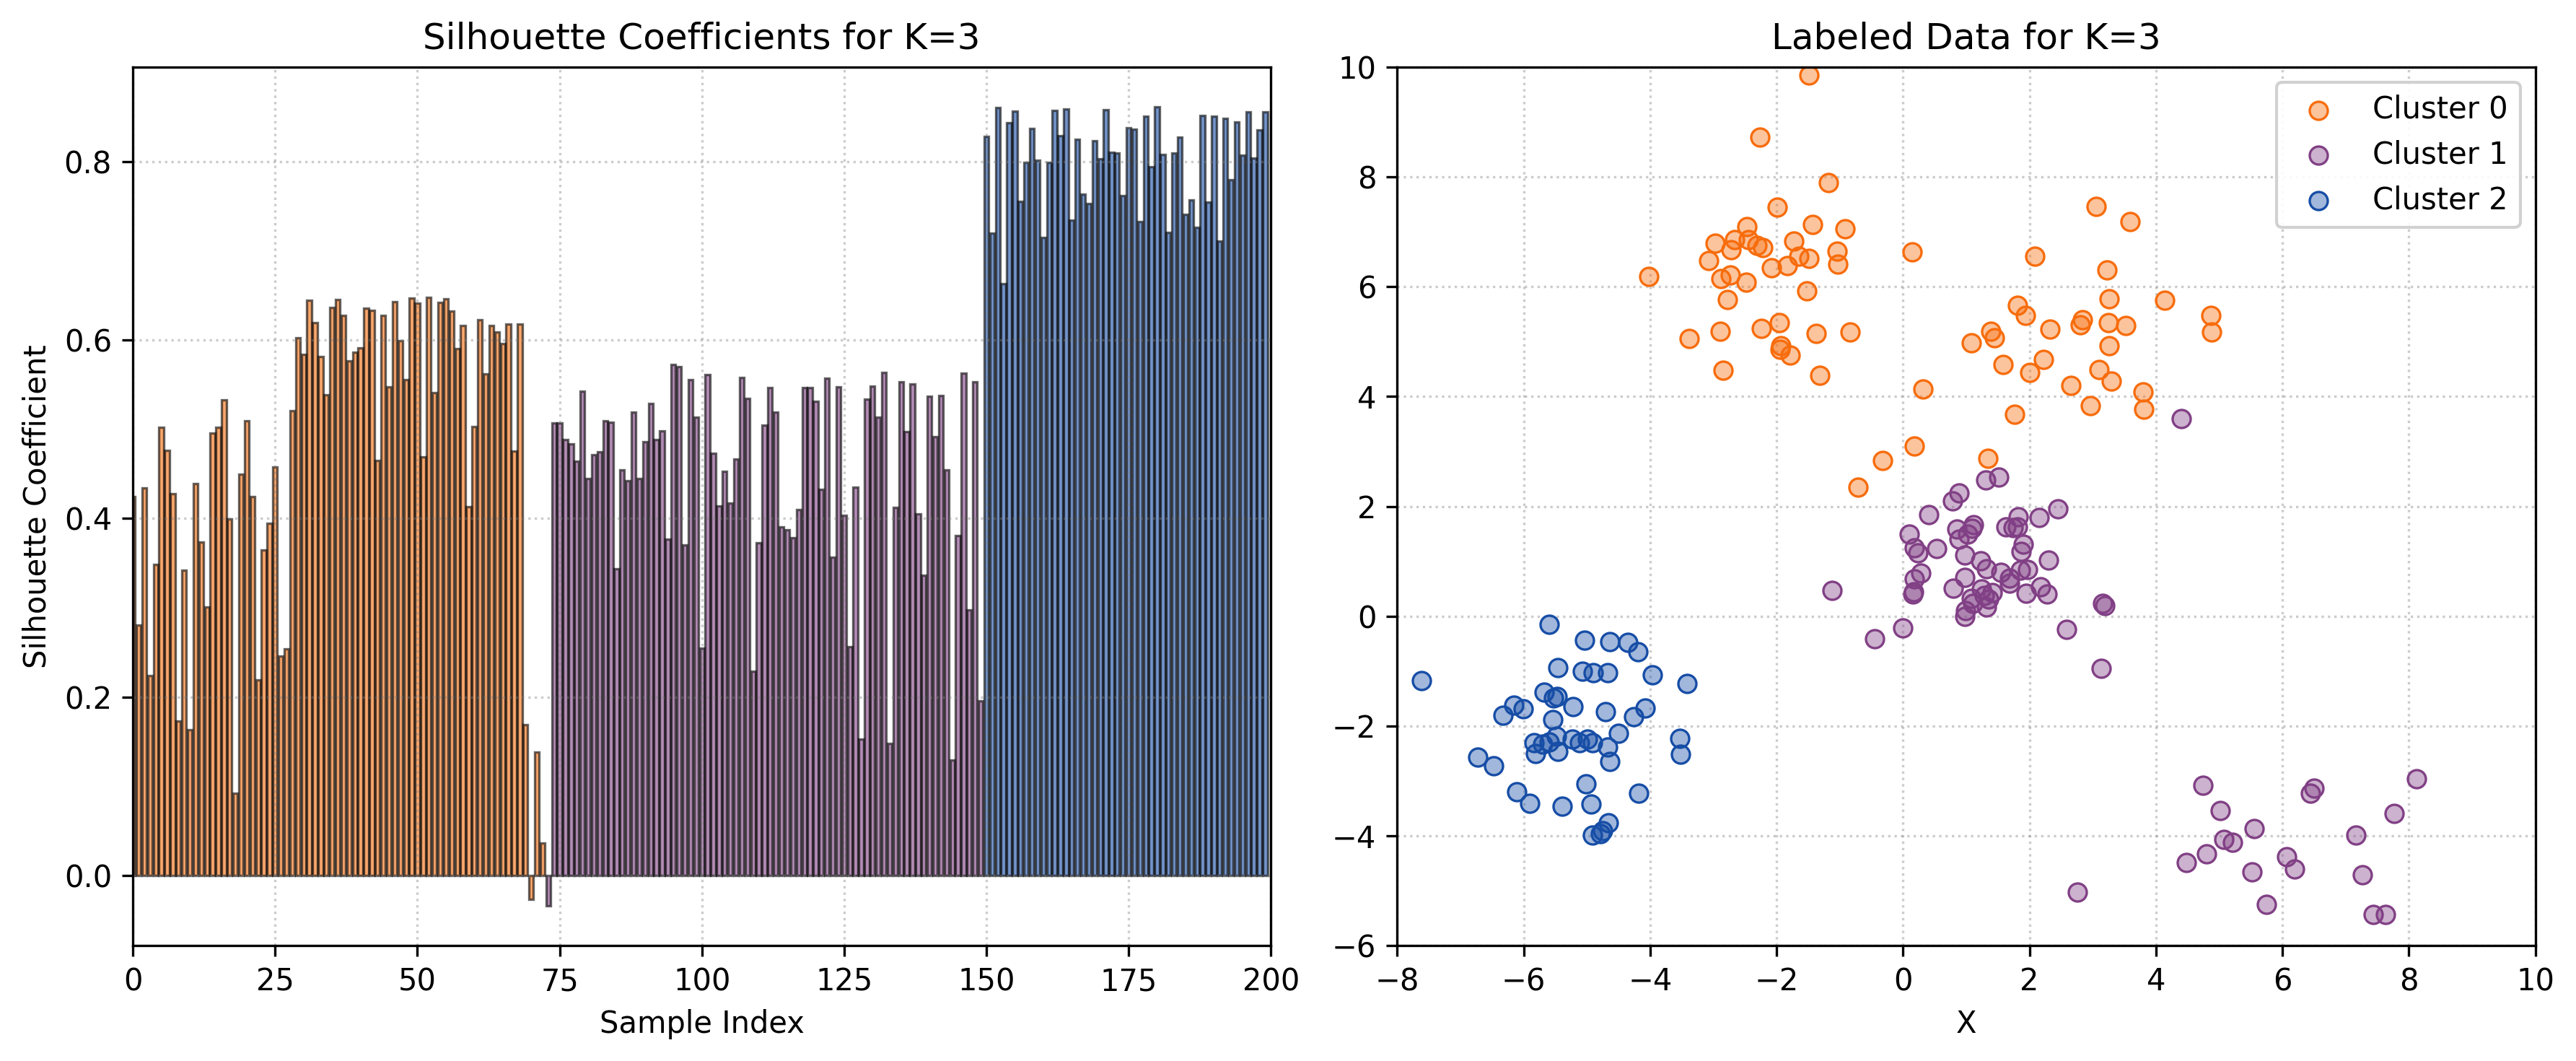

K=4, Silhouette Score=0.6169


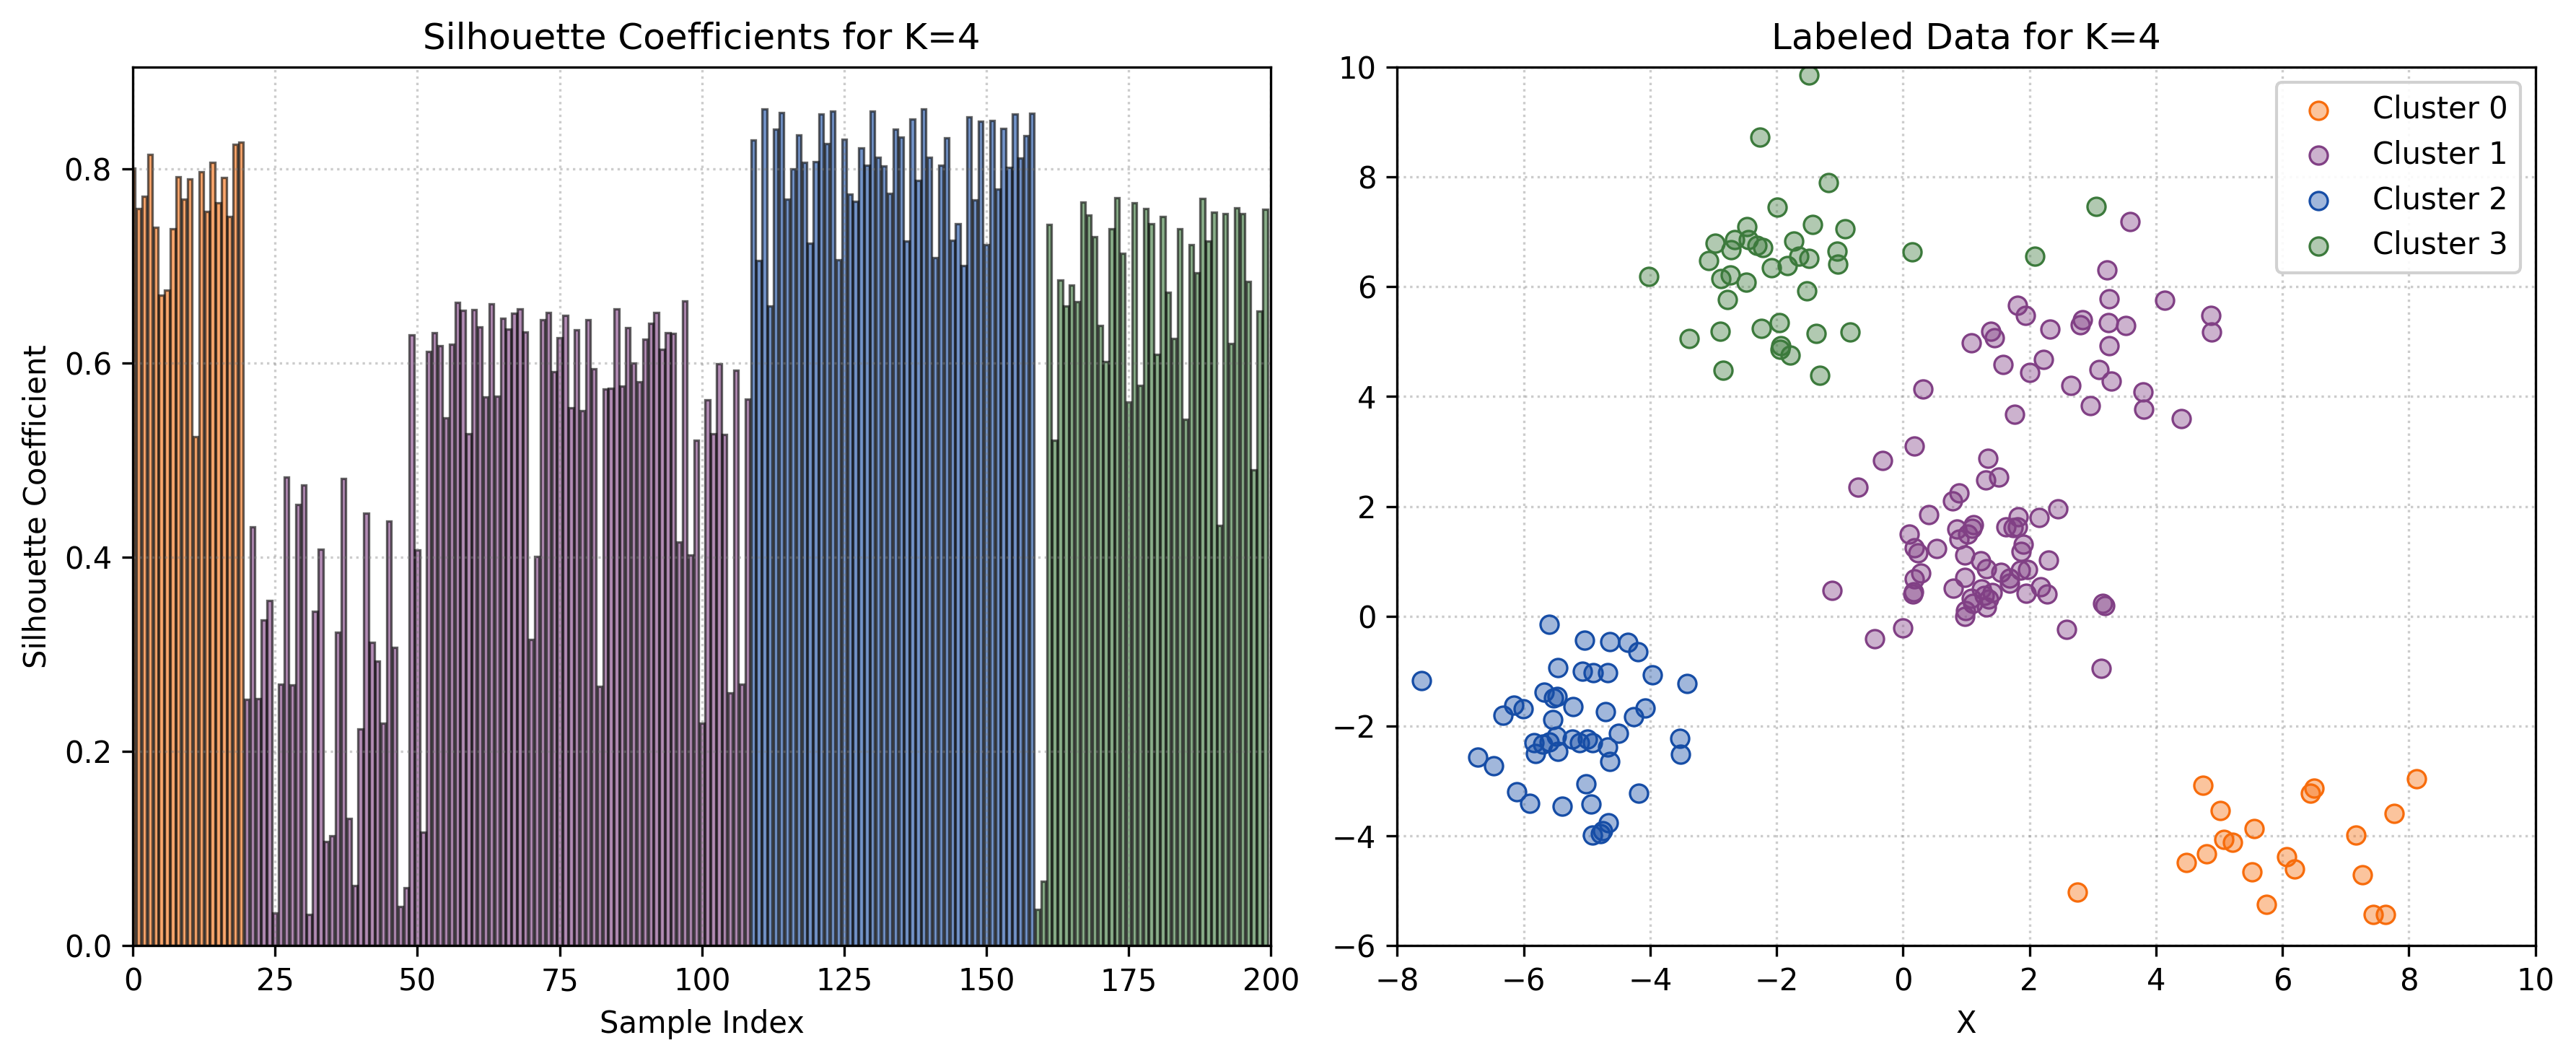

K=5, Silhouette Score=0.6733


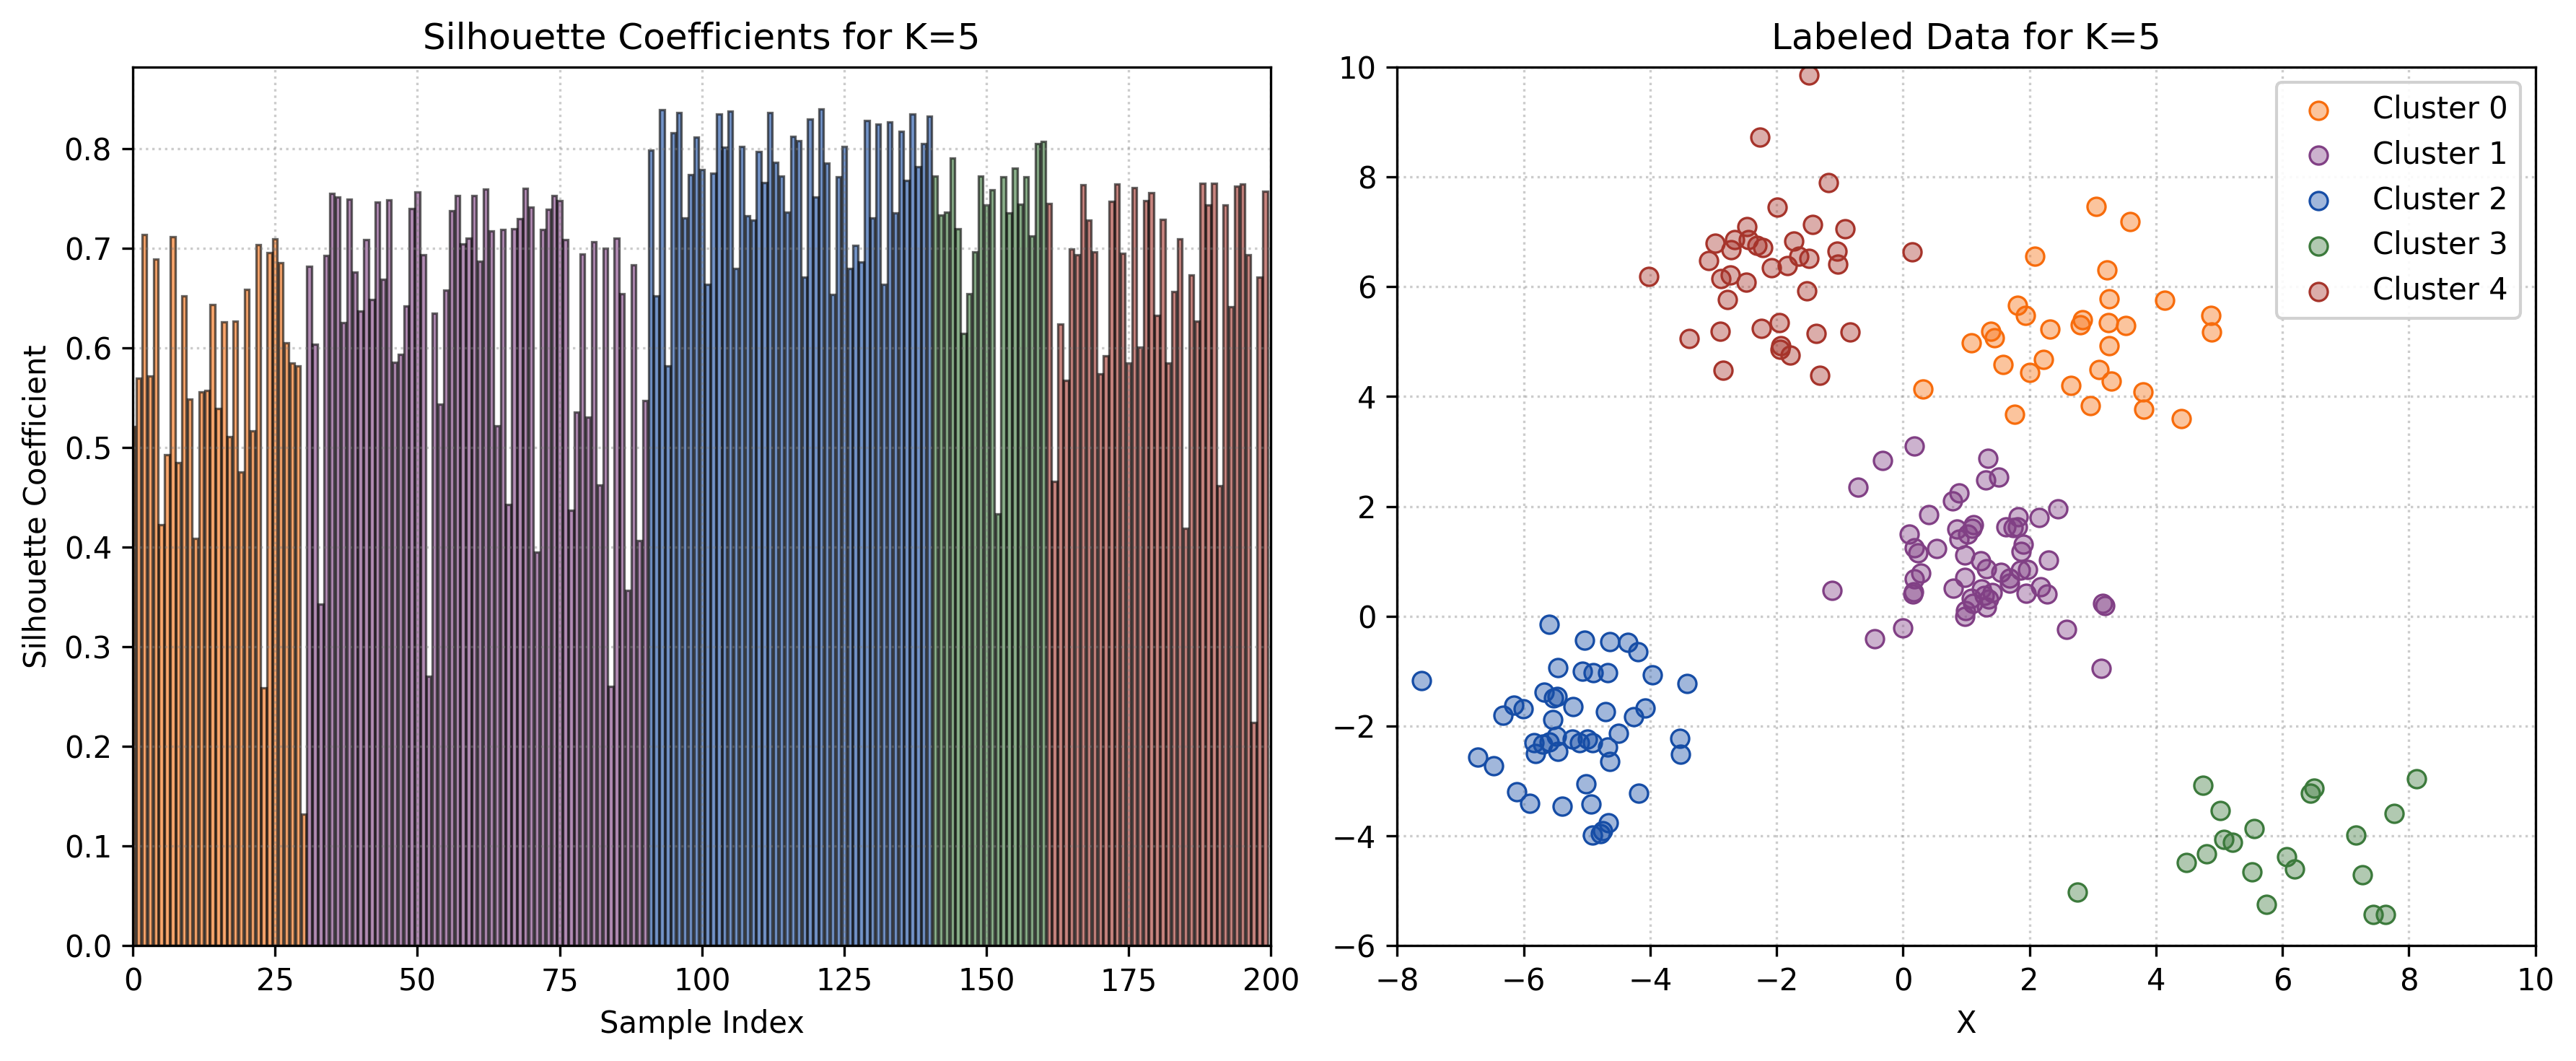

K=6, Silhouette Score=0.5701


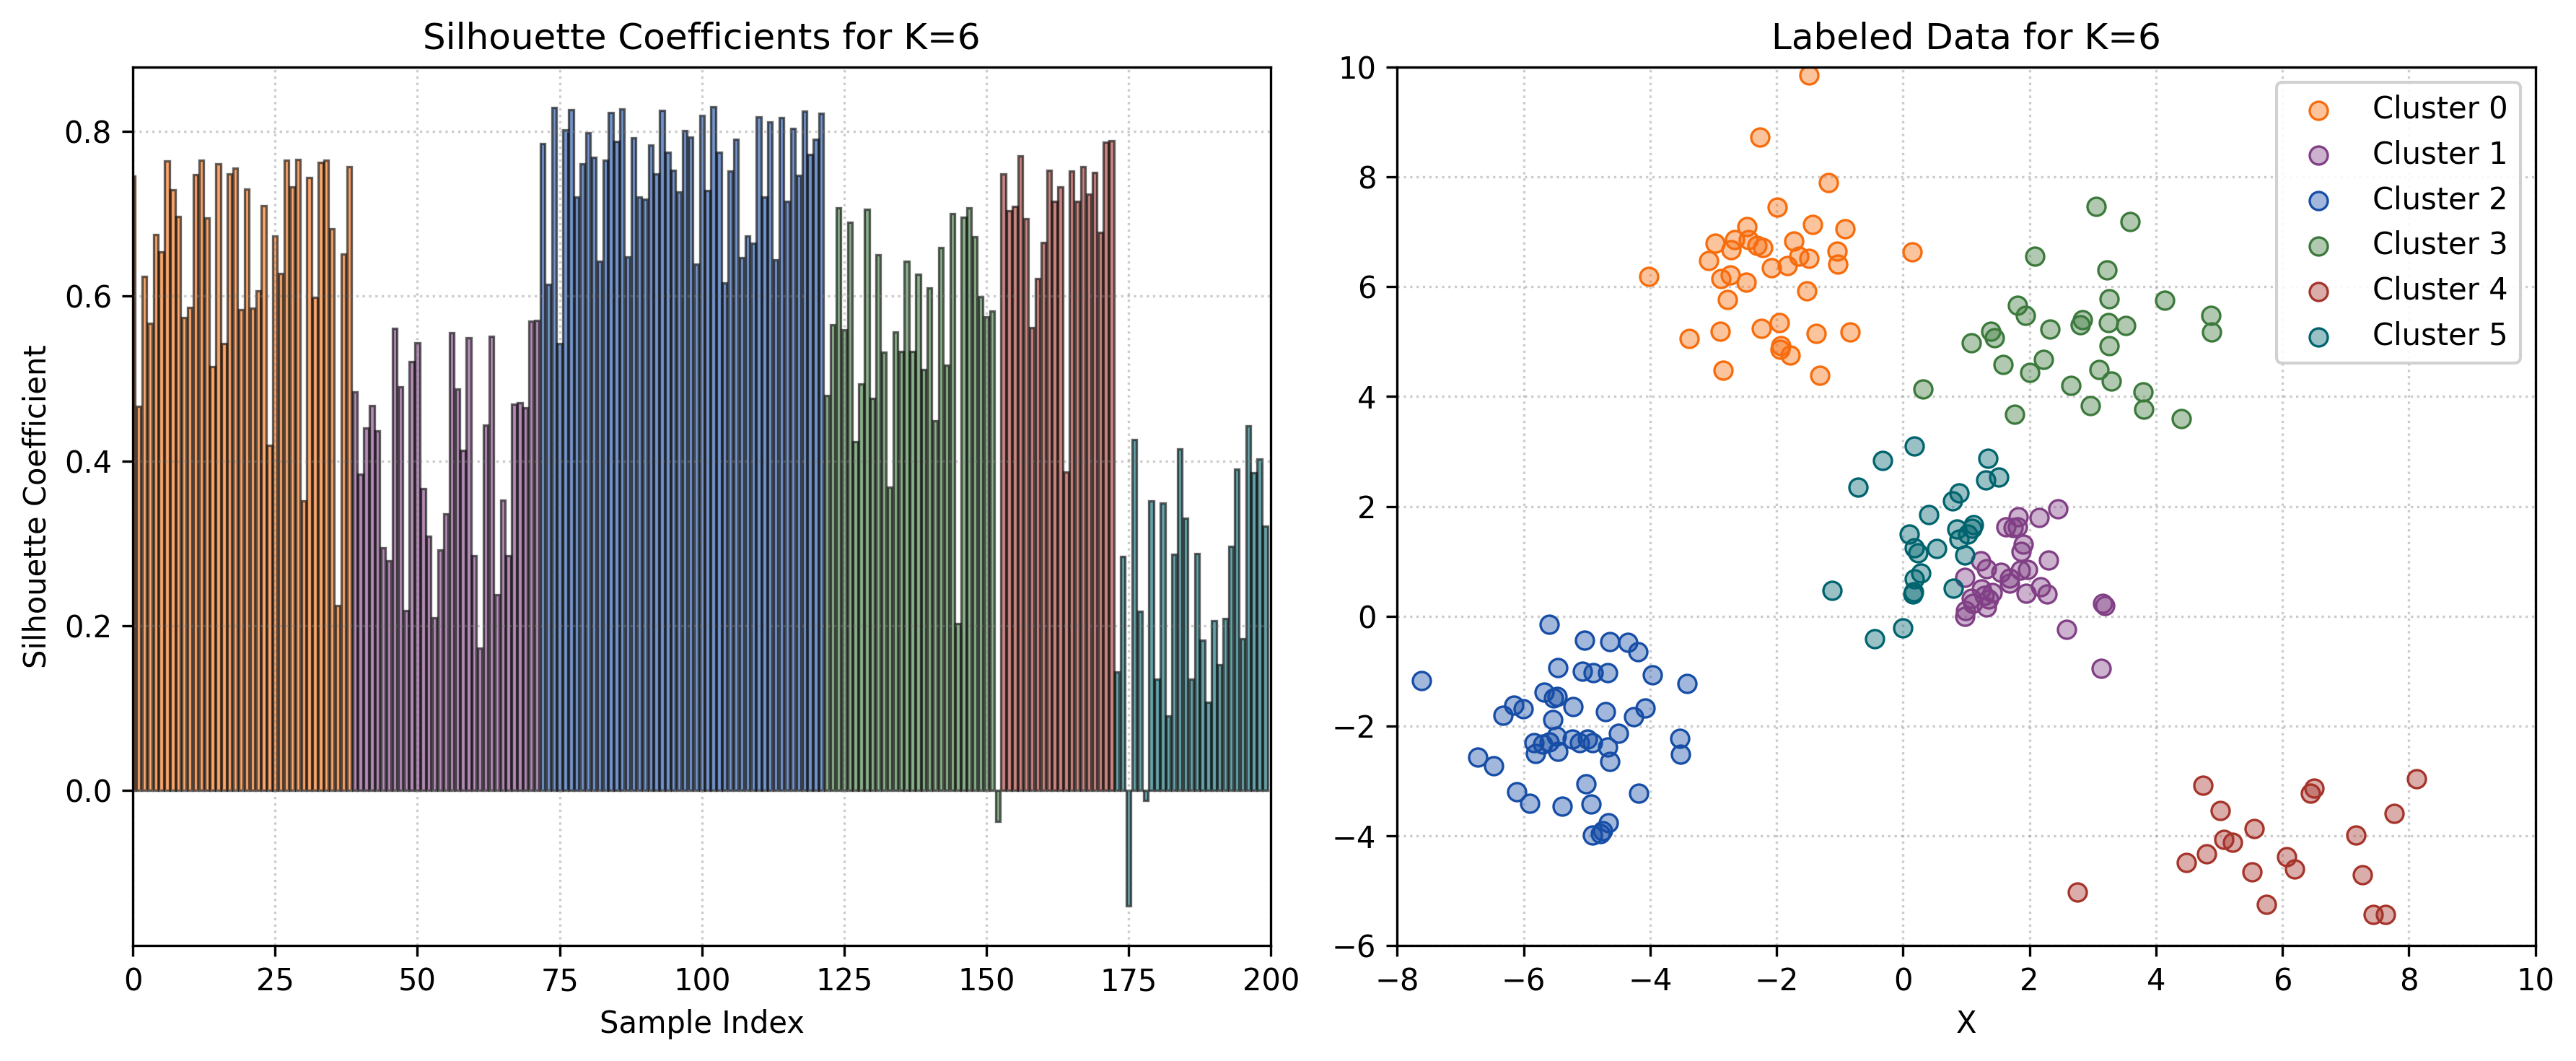

K=7, Silhouette Score=0.4677


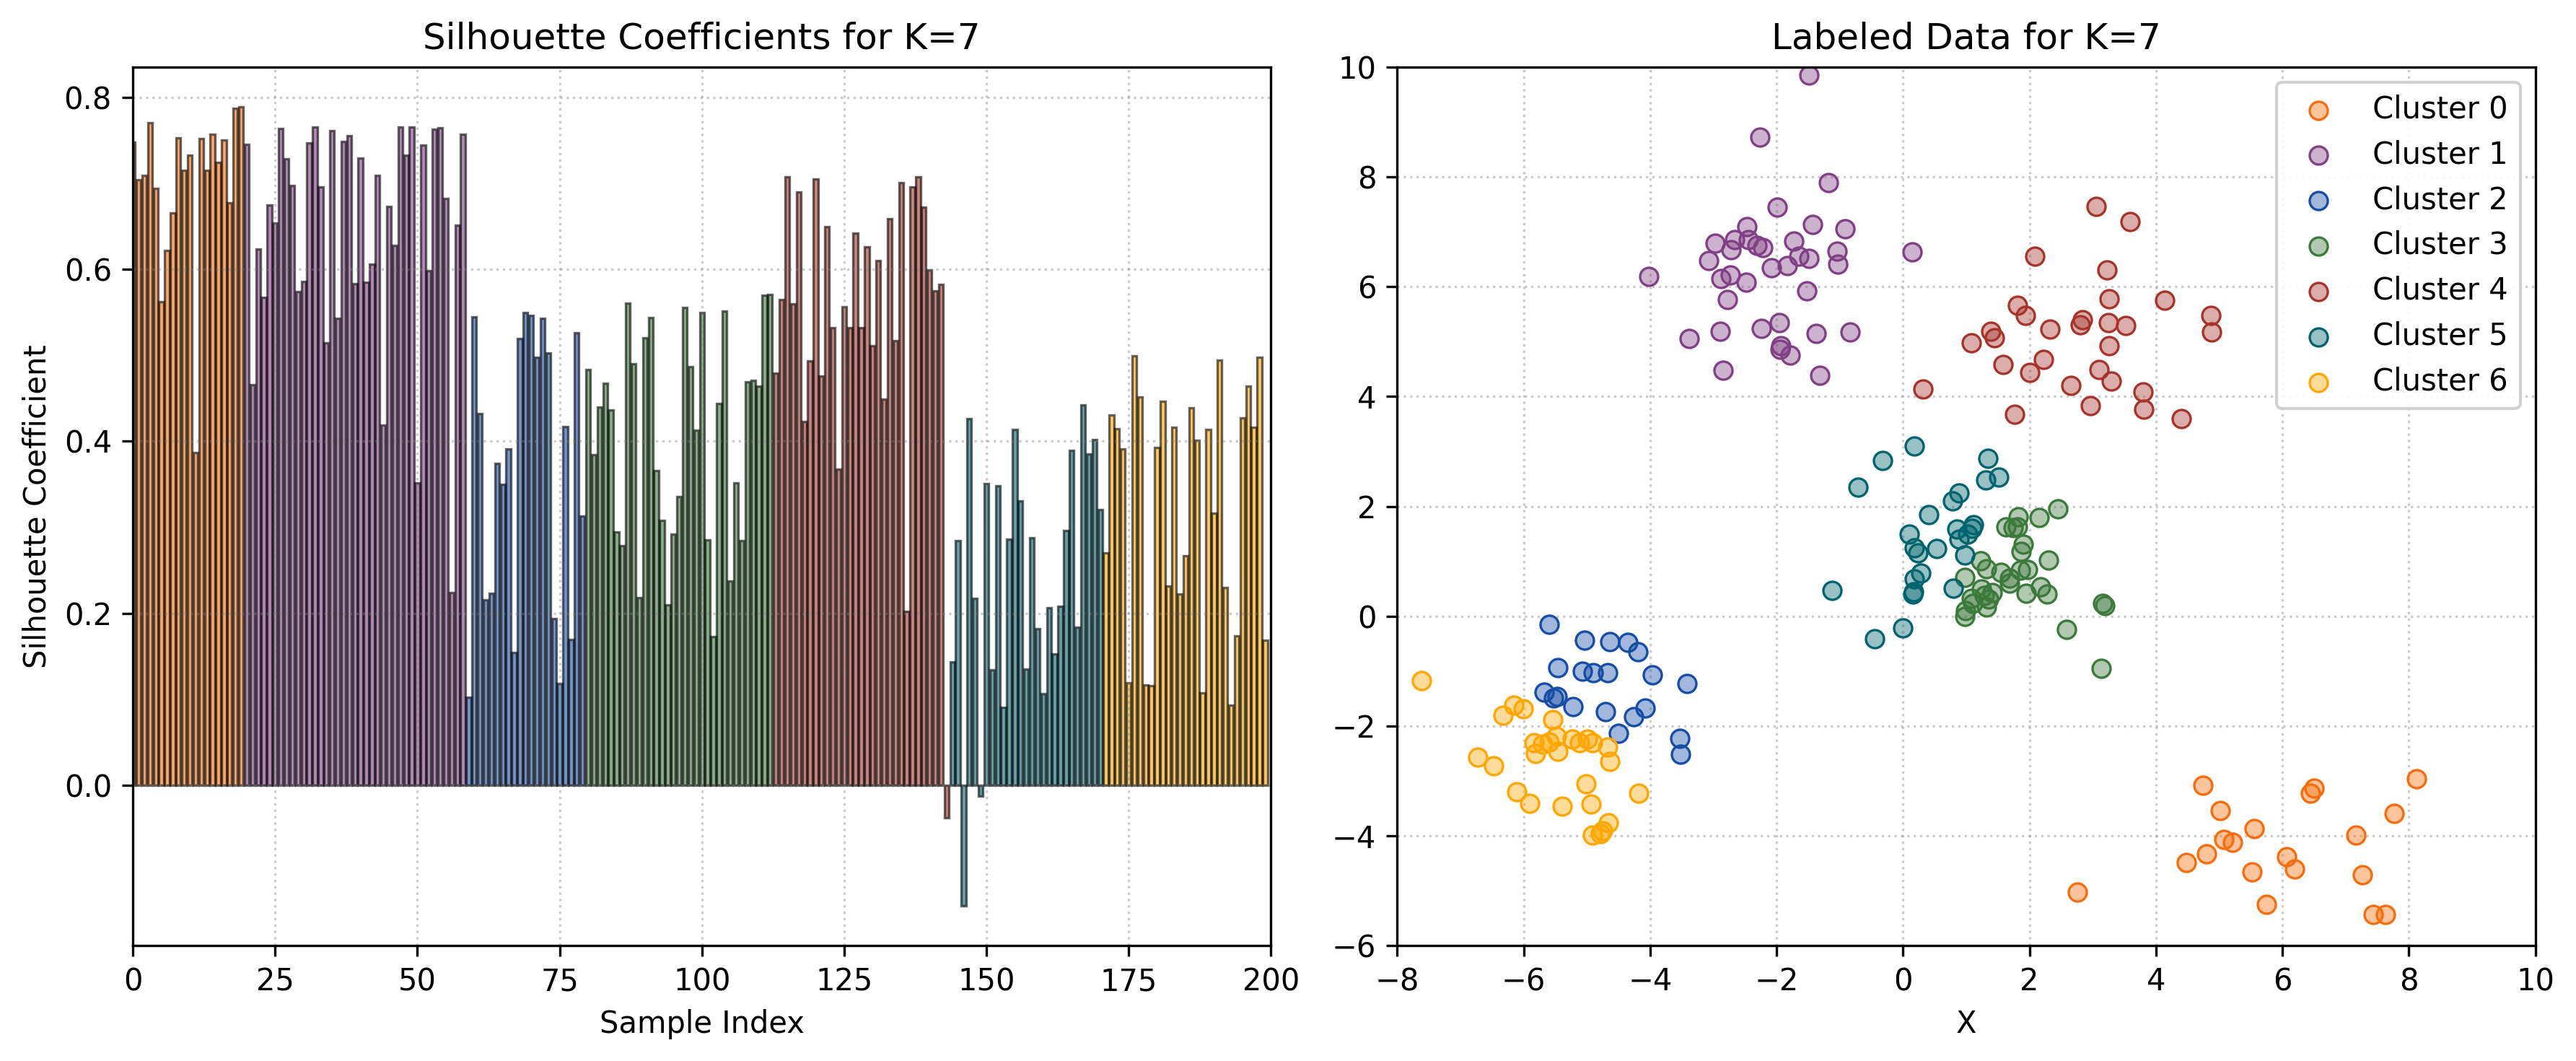

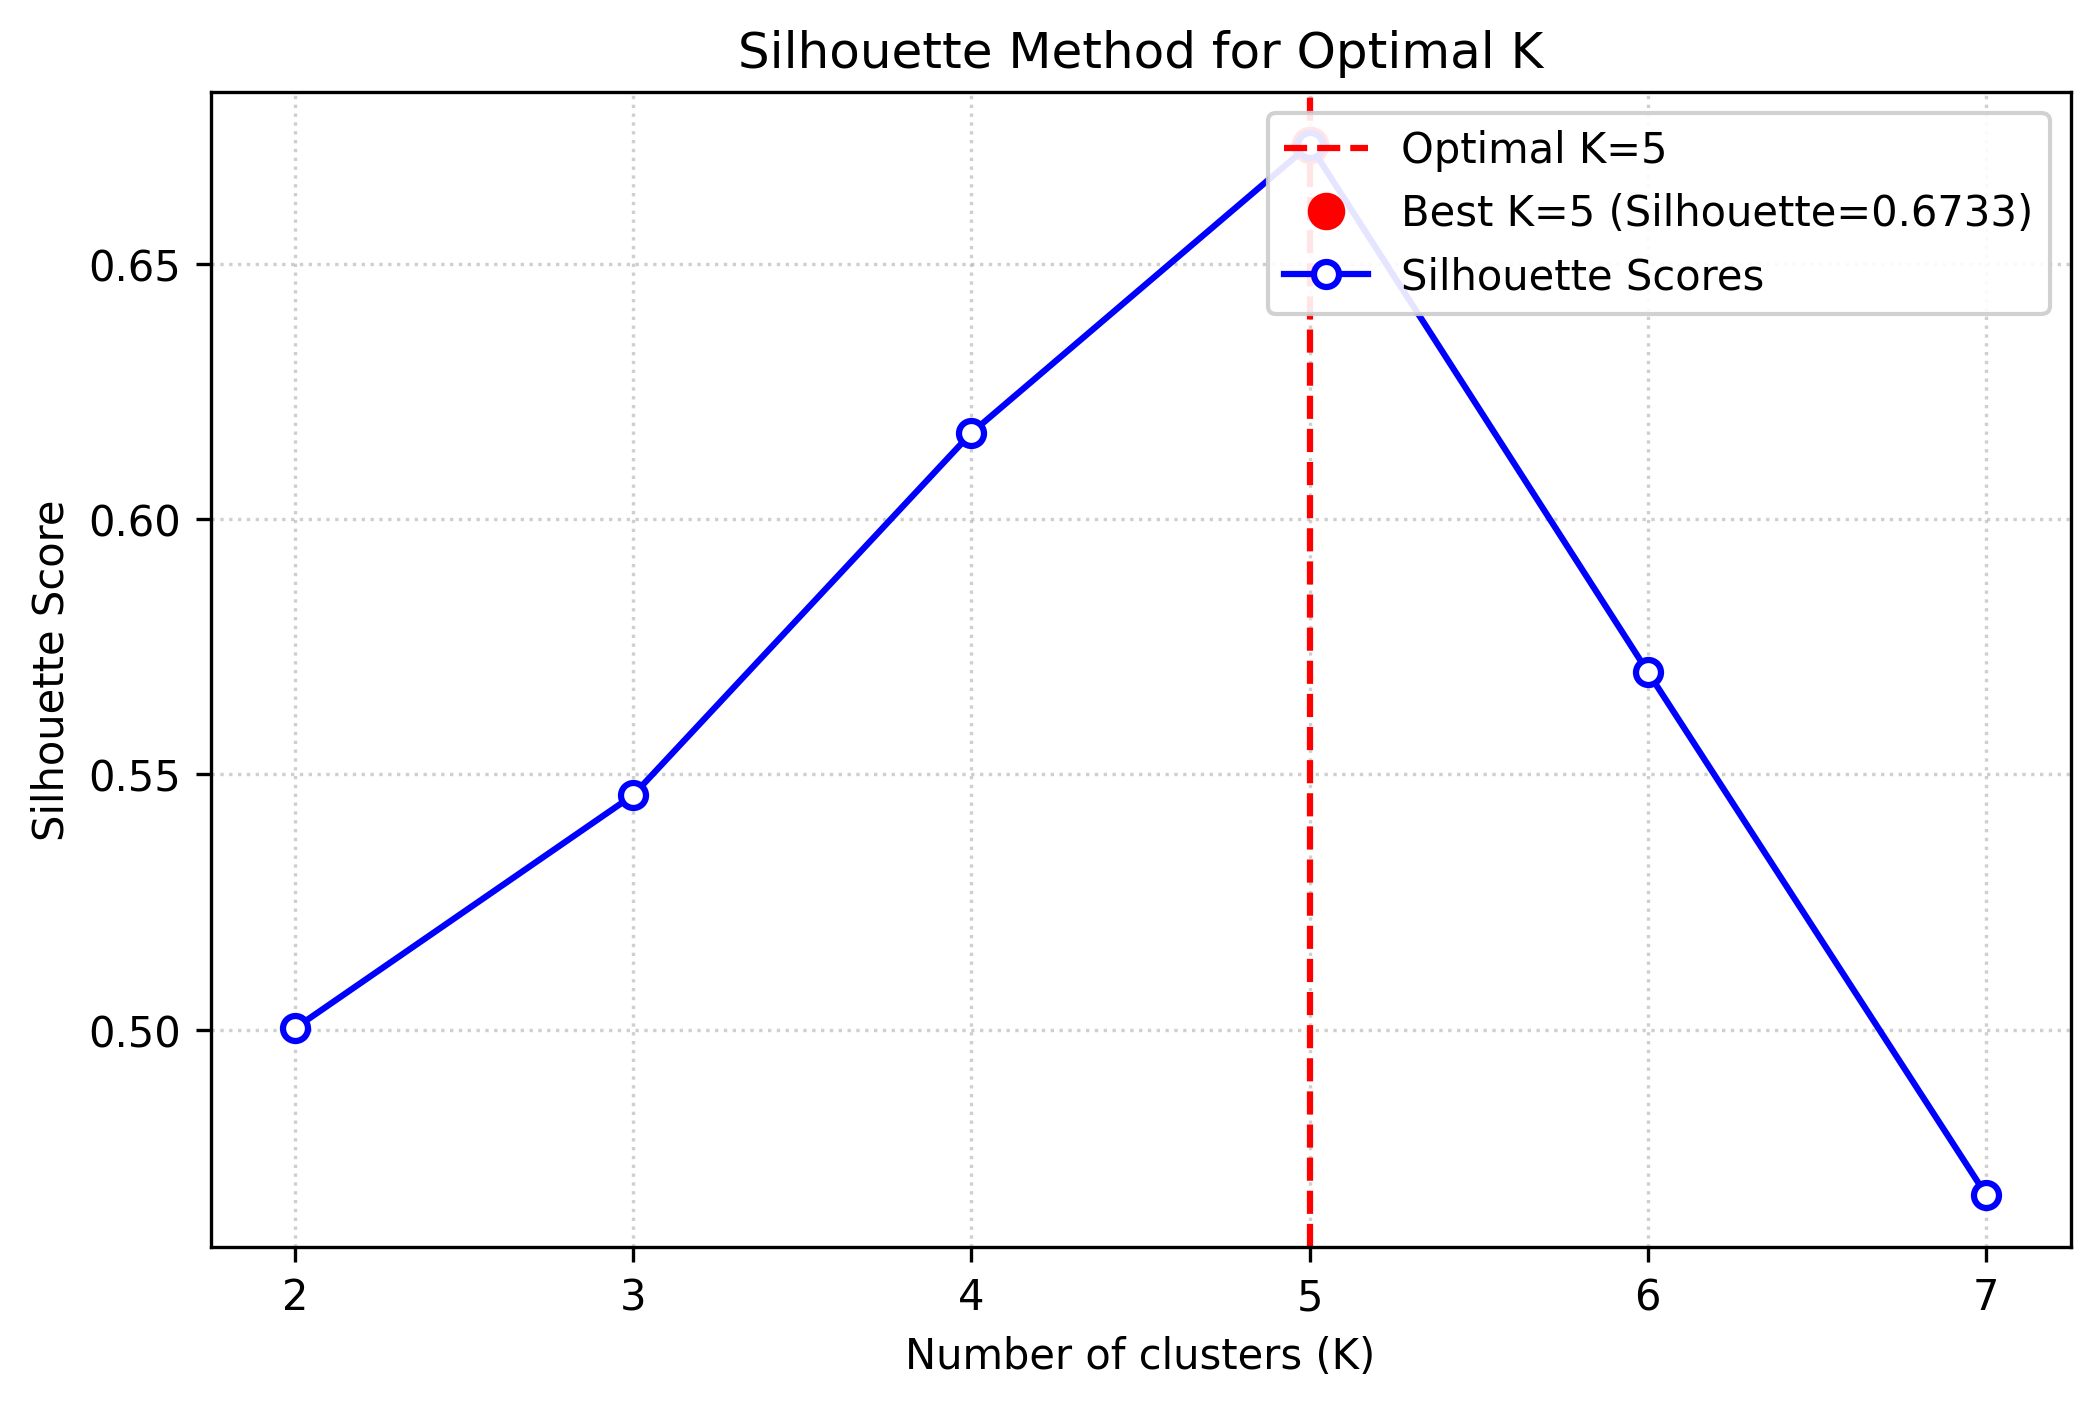

最佳K值为: 5


In [173]:
def silhouette_method(X, max_k=7):
    """ 使用轮廓系数法确定最佳K值 """
    silhouette_scores = []
    k_values = range(2, max_k+1)  # K值从2开始，因为K=1没有意义
    
    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_

        # 计算轮廓系数
        score = silhouette_score(X, labels)
        silhouette_scores.append(score)
        print(f"K={k}, Silhouette Score={score:.4f}")
        
        # 计算每个点的轮廓系数
        silhouette_values = silhouette_samples(X, labels)
        
        # 绘制左右图
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5), dpi=300)

        # 左图：每个点的轮廓系数（柱状图），按类分开
        start_idx = 0  # 用来确定每个类在柱状图中的位置
        for i in range(k):
            cluster_silhouette_vals = silhouette_values[labels == i]
            ax1.bar(range(start_idx, start_idx + len(cluster_silhouette_vals)), cluster_silhouette_vals, 
                    color=[(*class_colors[i % len(class_colors)], 0.4)], 
                    edgecolor='black', alpha=0.6, linewidth=0.8, 
                    label=f'Cluster {i}' if i == 0 else "")
            start_idx += len(cluster_silhouette_vals)  # 更新起始位置
        
        ax1.set(xlabel="Sample Index", ylabel="Silhouette Coefficient", title=f"Silhouette Coefficients for K={k}")
        # ax1.legend(loc="upper right", framealpha=0.9)
        ax1.grid(True, linestyle=':', color='gray', alpha=0.4)
        ax1.set_xlim([0, len(X)])
        
        # 右图：带标签数据
        for i in range(k):
            ax2.scatter(X[labels == i, 0], X[labels == i, 1],
                        facecolors=[(*class_colors[i % len(class_colors)], 0.4)],  
                        edgecolors=[class_colors[i % len(class_colors)]], 
                        linewidths=0.8, label=f'Cluster {i}', zorder=2)               
        ax2.legend(loc='upper right', framealpha=0.9)
        ax2.set(xlabel="X", title=f"Labeled Data for K={k}")
        ax2.grid(True, linestyle=':', color='gray', alpha=0.4)
        ax2.set_xlim([-8, 10])
        ax2.set_ylim([-6, 10])

        plt.tight_layout()
        plt.show()

    # 绘制轮廓系数曲线
    plt.figure(figsize=(8, 5), dpi=300)

    # 标记最佳K值
    best_k = k_values[np.argmax(silhouette_scores)]
    best_score = max(silhouette_scores)
    plt.axvline(best_k, color='r', linestyle='--', label=f'Optimal K={best_k}')
    plt.plot(best_k, best_score, 'ro', markersize=8, label=f'Best K={best_k} (Silhouette={best_score:.4f})')
    
    # 绘制轮廓系数曲线
    plt.plot(k_values, silhouette_scores, 'bo-', markersize=6, linewidth=1.5, 
             markerfacecolor='white', markeredgewidth=1.5, label='Silhouette Scores')
    
    plt.xlabel('Number of clusters (K)', fontsize=10)
    plt.ylabel('Silhouette Score', fontsize=10)
    plt.title('Silhouette Method for Optimal K', fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.xticks(k_values)
    plt.legend(loc='upper right', framealpha=0.9)
    plt.show()
    
    print(f"最佳K值为: {best_k}")

# 示例数据生成
silhouette_method(X)

K=1, Gap Statistic=0.2294
K=2, Gap Statistic=0.3602
K=3, Gap Statistic=0.4006
K=4, Gap Statistic=0.5710
K=5, Gap Statistic=0.7902
K=6, Gap Statistic=0.7628
K=7, Gap Statistic=0.7207
K=8, Gap Statistic=0.6716
K=9, Gap Statistic=0.6820
K=10, Gap Statistic=0.6630


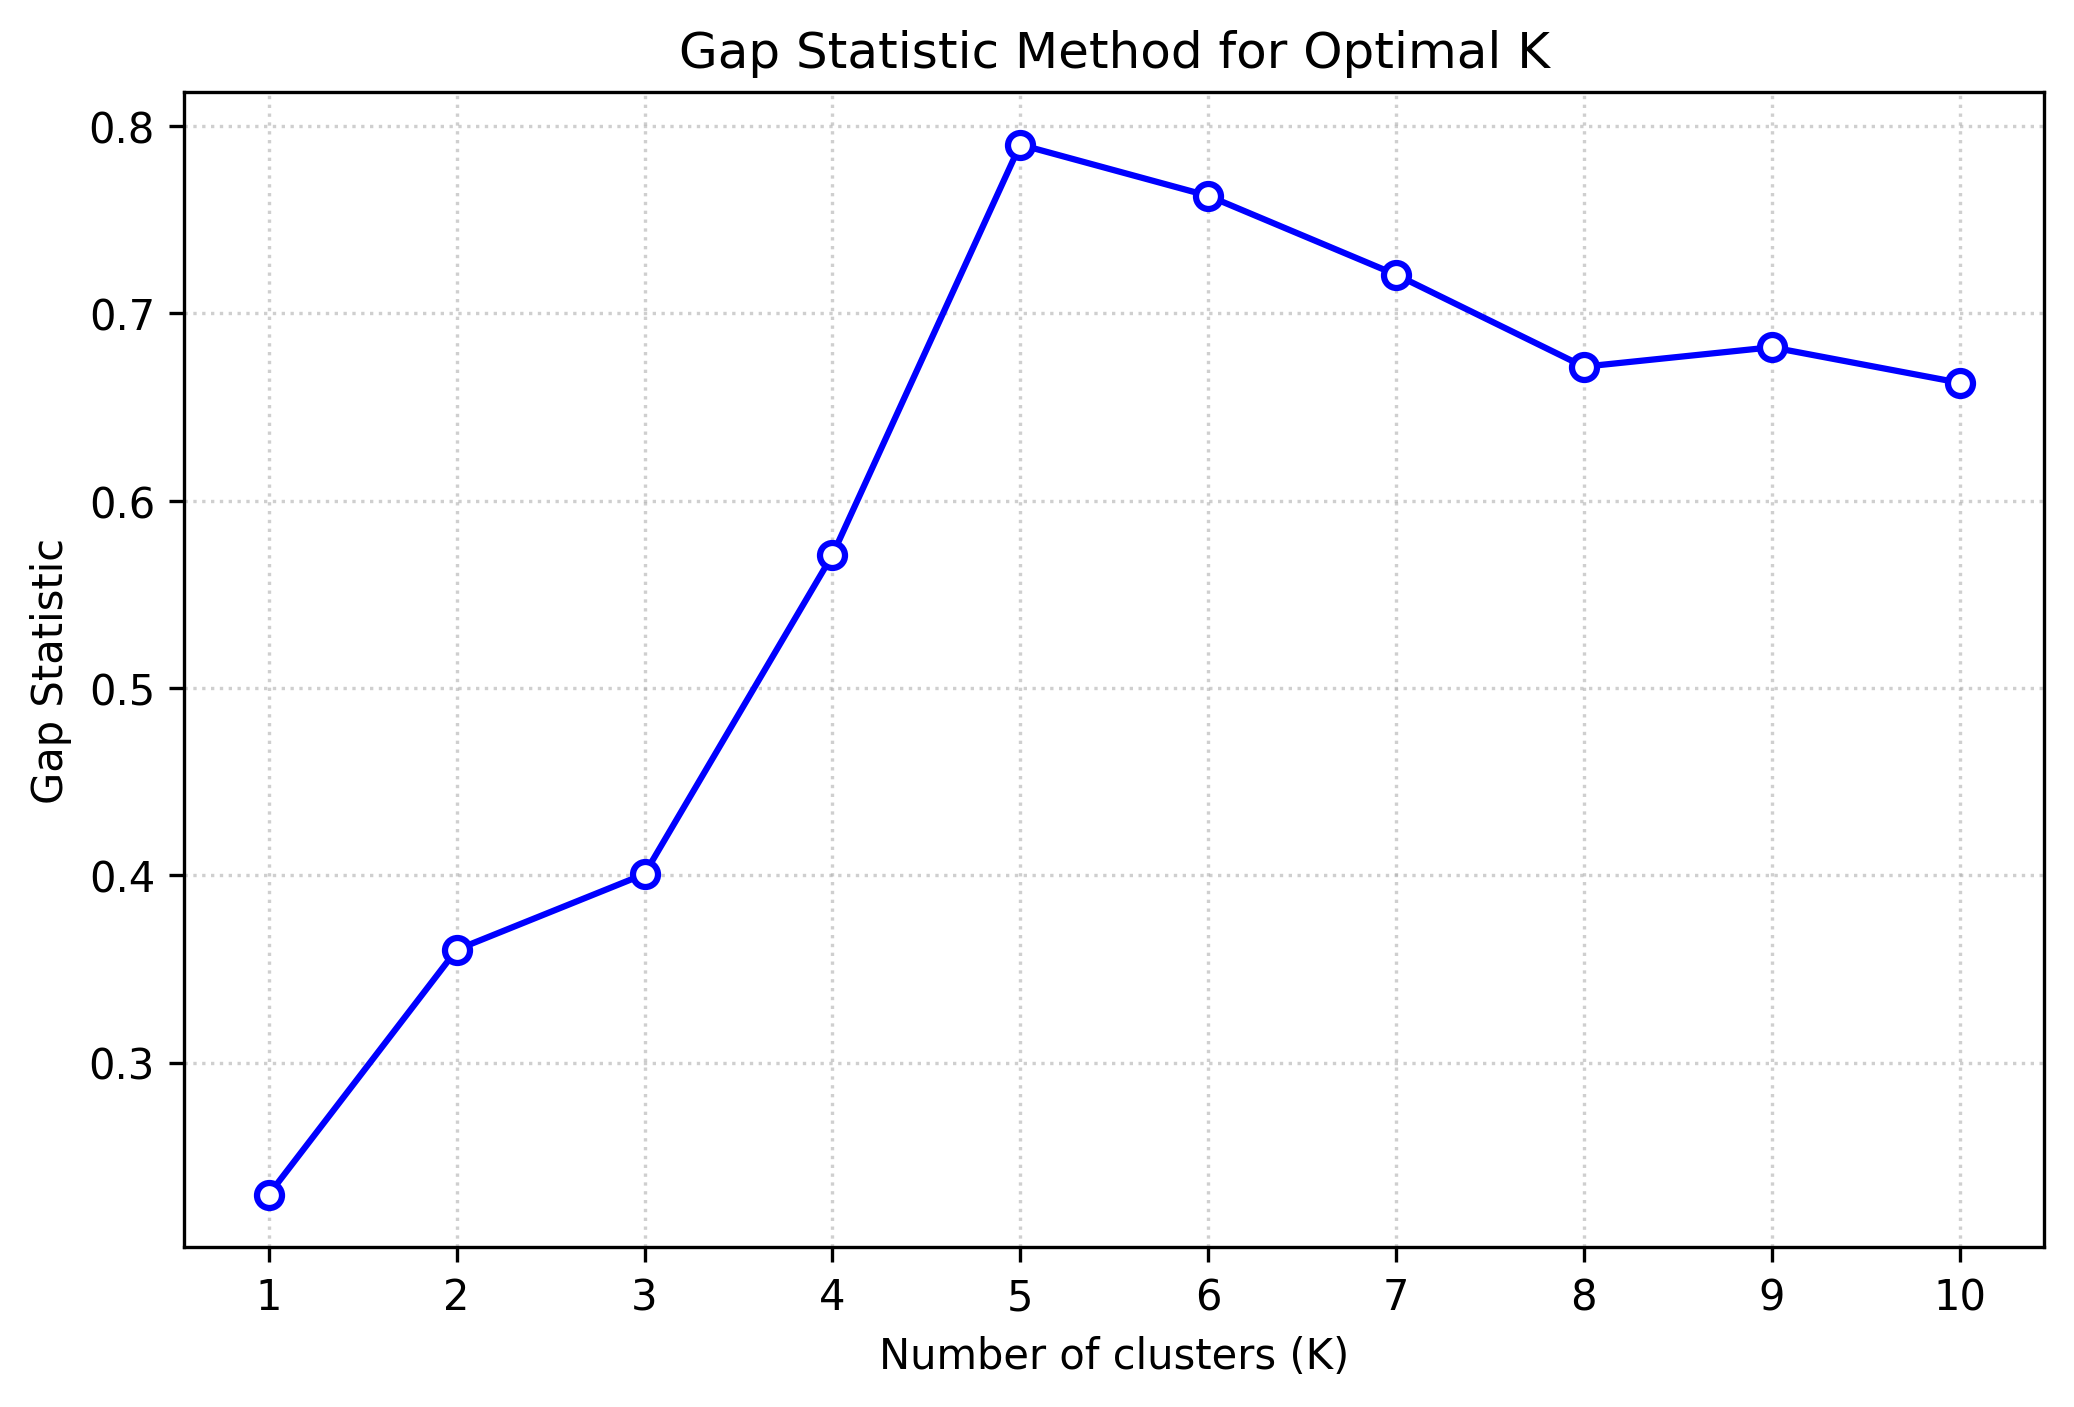

最佳K值为: 5


np.int64(5)

In [174]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def gap_statistic(X, max_k=10, n_references=10):
    """ 使用 Gap Statistic 方法确定最佳K值 """
    # 计算原始数据的Wk值
    def calculate_Wk(X, k):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)
        labels = kmeans.labels_
        # 计算每个点到其簇中心的距离之和
        _, dist = pairwise_distances_argmin_min(X, kmeans.cluster_centers_)
        return np.sum(dist)

    gaps = []
    for k in range(1, max_k + 1):
        # 计算真实数据的Wk值
        Wk_data = calculate_Wk(X, k)

        # 计算均匀分布的Wk值
        Wk_reference = []
        for _ in range(n_references):
            random_data = np.random.uniform(np.min(X, axis=0), np.max(X, axis=0), size=X.shape)
            Wk_random = calculate_Wk(random_data, k)
            Wk_reference.append(Wk_random)
        
        # 计算Gap值
        gap = np.mean(np.log(Wk_reference)) - np.log(Wk_data)
        gaps.append(gap)

        print(f"K={k}, Gap Statistic={gap:.4f}")
    
    # 绘制 Gap Statistic 曲线
    plt.figure(figsize=(8, 5), dpi=300)
    plt.plot(range(1, max_k+1), gaps, 'bo-', markersize=6, linewidth=1.5, markerfacecolor='white', markeredgewidth=1.5)
    plt.xlabel('Number of clusters (K)', fontsize=10)
    plt.ylabel('Gap Statistic', fontsize=10)
    plt.title('Gap Statistic Method for Optimal K', fontsize=12)
    plt.grid(True, linestyle=':', alpha=0.6)
    plt.xticks(range(1, max_k+1))
    plt.show()

    # 返回最佳K值
    best_k = np.argmax(gaps) + 1  # Gap最大时对应的K值
    print(f"最佳K值为: {best_k}")
    return best_k

gap_statistic(X, max_k=10)